# Time Series vs Supervised Learning

In [20]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import Series
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Zadanie
Wczytaj dane "Monthly Car Sales Dataset", które pisują liczbę sprzedanych samochodów w Quebec, Kanada w latach 1960 i 1968.

In [21]:
series_row = Series.from_csv('./monthly-car-sales-in-quebec-1960.csv', header=0)
print(series_row.head(5))

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Monthly car sales in Quebec 1960-1968, dtype: int64


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

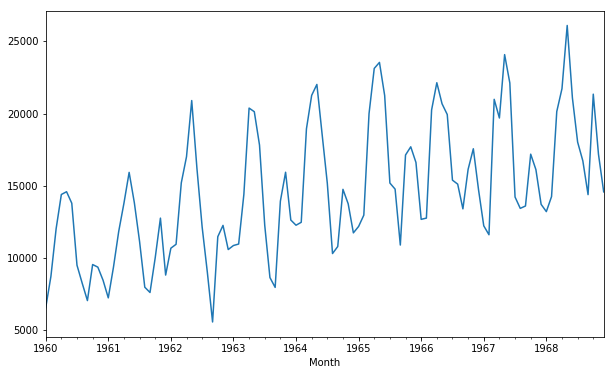

In [23]:
plt.figure(figsize=(10,6));
series_row.plot()
plt.show()

In [4]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [5]:
series_row_np = series_row.values
test_series = series_row.values[-20:]
series = series_row.values[:-20]

In [6]:
print(test_series.shape)
print(series.shape)

(20,)
(88,)


In [7]:
df = pd.DataFrame()
df['t'] = [x for x in series]
dataframe = series_to_supervised(df, 15)
dataframe.head()

,var1(t-15),var1(t-14),var1(t-13),var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
15,6550.0,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784
16,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926
17,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926.0,13821
18,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926.0,13821.0,11143
19,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926.0,13821.0,11143.0,7975


# Zadanie
Proszę wybrać optymalną metodę regresji do powyższych danych.

  * prosze podzielić zbiór danych na czść treningową i testową
  * proszę za pomoca cross validat-cji dobrać optymalne parametry
  * proszę wypisać zbiorcza tabelę z wynikami względem miar
    * explained_variance_score
    * mean_absolute_error
    * mean_squared_error
    * median_absolute_error
    * r2
  * Proszę użyć  
    * ElasticNet sklearn.linear_model.ElasticNet
    * Lasso sklearn.linear_model.Lasso
    * Ridge sklearn.linear_model.Ridge
    * LR sklearn.linear_model.LinearRegression
    * SVR sklearn.svm.SVR
    * RFR sklearn.ensemble.RandomForestRegressor
    * MLP_R sklearn.neural_network.MLPRegressor 

In [8]:
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
seed=123
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=4, random_state=seed)

In [11]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [1., 2., 3.]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X_train, y_train)
print(grid_1.best_params_)
grid_1.best_estimator_


{'elasticnet__alpha': 3.0, 'polynomialfeatures__degree': 1}


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=3.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.1, warm_start=False))])

In [12]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [1., 2., 3.]},
                    cv=kfold,
                    refit=True)
grid_2.fit(X_train, y_train)
print(grid_2.best_params_)
grid_2.best_estimator_

{'lasso__alpha': 3.0, 'polynomialfeatures__degree': 1}


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.1, warm_start=False))])

In [13]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [1., 2., 3.]},
                    cv=kfold,
                    refit=True)
grid_3.fit(X_train, y_train)
print(grid_3.best_params_)
grid_3.best_estimator_

C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.568120215530553e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.7342836250922505e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.226809120538361e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. 

C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.8725582541994602e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.944195169589407e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.143406187454869e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. 

{'polynomialfeatures__degree': 1, 'ridge__alpha': 3.0}


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1))])

In [14]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=True)
grid_4.fit(X_train, y_train)
print(grid_4.best_params_)
grid_4.best_estimator_

{'polynomialfeatures__degree': 1}


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [15]:
from sklearn.svm import SVR
grid_5 = GridSearchCV(SVR(kernel='rbf'),
                   param_grid={"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                               "gamma": [0.0000000001, 0.000000001,  0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                    cv=kfold,
                    refit=True)
grid_5.fit(X_train, y_train)
print(grid_5.best_params_)
grid_5.best_estimator_

{'C': 1000, 'gamma': 1e-09}


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-09,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
from sklearn.ensemble import RandomForestRegressor

grid_6 = GridSearchCV(RandomForestRegressor(n_jobs=-1, max_features= 'sqrt', n_estimators=50, oob_score = True),
                   param_grid={
                   'n_estimators': [150, 300, 400],
                    'max_features': ['auto', 'sqrt', 'log2'],  
                    'max_depth': [ 400, 500, 600]
                   },
                    cv=kfold,
                    refit=True)
grid_6.fit(X_train, y_train)
print(grid_6.best_params_)
grid_6.best_estimator_


{'max_depth': 600, 'max_features': 'sqrt', 'n_estimators': 300}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=600,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [17]:
grid_7 = GridSearchCV(MLPRegressor(hidden_layer_sizes=(100,100,100),activation='tanh',alpha=0.0001),#model powinien byc zainicjalizowany
                    param_grid={'hidden_layer_sizes': [(100,100,100)],
                                'alpha': [10],
                               'activation': ['relu']                               
                               },#parametry do podstawienia
                    cv=kfold,#na ile czesci ma dzielic zbior
                    n_jobs=2,
                    refit=True)
grid_7.fit(X_train, y_train)
print(grid_7.best_params_)
grid_7.best_estimator_

{'activation': 'relu', 'alpha': 10, 'hidden_layer_sizes': (100, 100, 100)}


MLPRegressor(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [18]:
from sklearn import  metrics


models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
models.append(('SVR', grid_5.best_estimator_))
models.append(('RFR', grid_6.best_estimator_))
models.append(('MLP_R', grid_7.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

ElasticNet
R^2: 0.6591902935067834
Explained variance score: 0.6594268037959596
Median absolute error: 1892.1230803345152
Mean squared error: 4185332.61625686
Mean absolute errors: 1762.420109345078
Lasso
R^2: 0.6591906909939484
Explained variance score: 0.6594272051947039
Median absolute error: 1892.1232070095866
Mean squared error: 4185327.7348935506
Mean absolute errors: 1762.4187204184589
Ridge
R^2: 0.651035810637242
Explained variance score: 0.6682345372596064
Median absolute error: 1627.9546847203055
Mean squared error: 4285474.198120165
Mean absolute errors: 1659.1402170137749
LR
R^2: 0.6510357950610217
Explained variance score: 0.6682345247670636
Median absolute error: 1627.9546637906733
Mean squared error: 4285474.389404807
Mean absolute errors: 1659.1402530563548
SVR
R^2: 0.43530423126318496
Explained variance score: 0.5538657119084455
Median absolute error: 1706.8571447966096
Mean squared error: 6934777.895486595
Mean absolute errors: 2156.0264302037417
RFR
R^2: 0.6883869655

In [19]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet','Lasso', 'Ridge','LR','SVR','RFR','MLP_R'])
df

,Method,explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2
0,ElasticNet,0.659427,1762.420109,4.185333e+06,1892.123080,0.659190
1,Lasso,0.659427,1762.418720,4.185328e+06,1892.123207,0.659191
2,Ridge,0.668235,1659.140217,4.285474e+06,1627.954685,0.651036
3,LR,0.668235,1659.140253,4.285474e+06,1627.954664,0.651036
4,SVR,0.553866,2156.026430,6.934778e+06,1706.857145,0.435304
5,RFR,0.707666,1552.648444,3.826781e+06,1262.880000,0.688387
6,MLP_R,-0.111251,4807.482419,3.351991e+07,4318.027019,-1.729511


In [103]:
# X = series.values
# train, test = X[0:-12], X[-12:]
train = series
test = test_series
# X = series_row
series_row.shape[0]

108

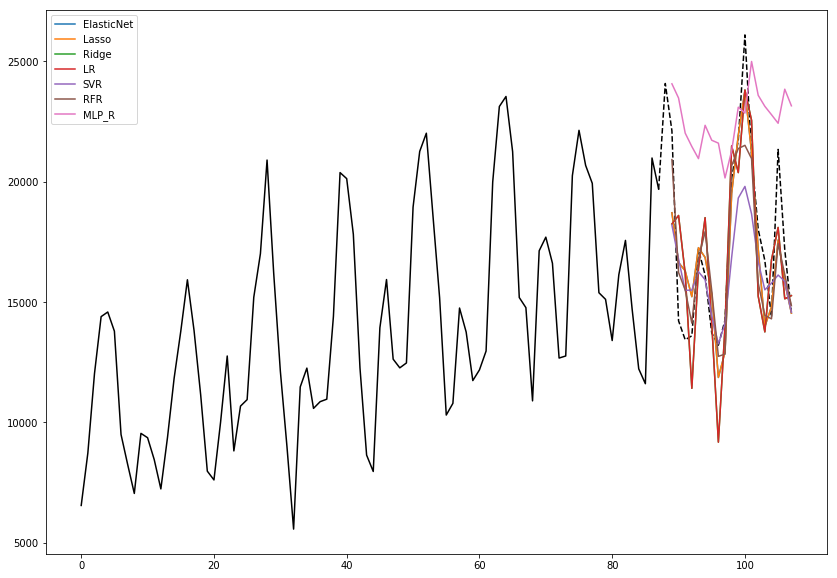

In [117]:
size=15

plt.figure(figsize=(14,10))
plt.plot(series,'k-')
data = np.zeros(series_row_np.shape[0], dtype=float)
data.fill(np.nan)
data[-21:] = series_row.values[-21:]
plt.plot(data, 'k--')

all_data = []
for name, model in models: 
    data = np.zeros(series_row_np.shape[0], dtype=float)
    data.fill(np.nan)
    for i in range(1,20):
        point = np.array([series_row_np[ (series_row_np.shape[0]-((size+1*i))):(series_row_np.shape[0]-(1*i))]])
        pre=model.predict(point)
        
        data[-i]=pre
    all_data.append(data)
    plt.plot( data , label=name)
    plt.legend(loc='best')
plt.show()

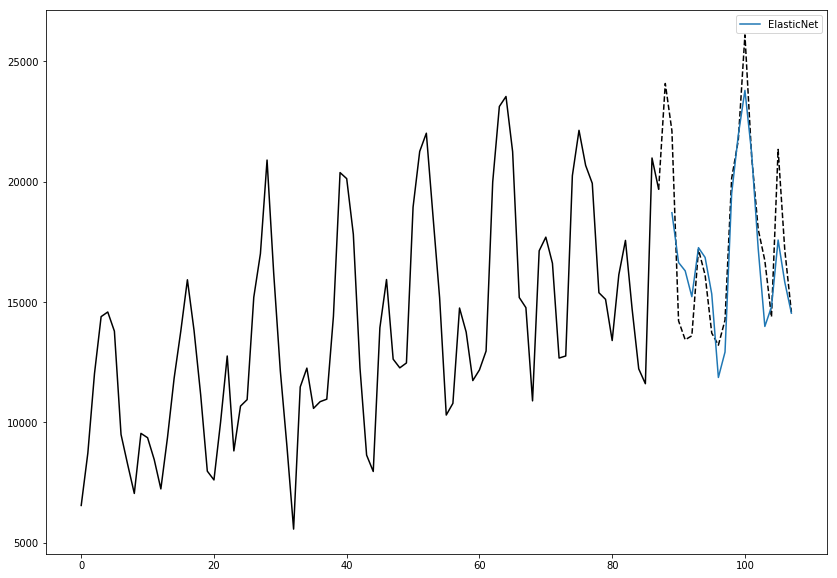

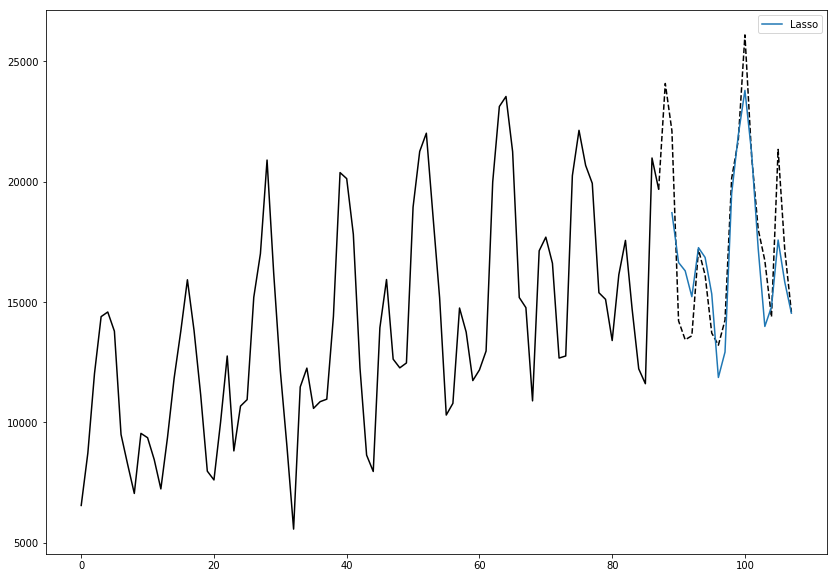

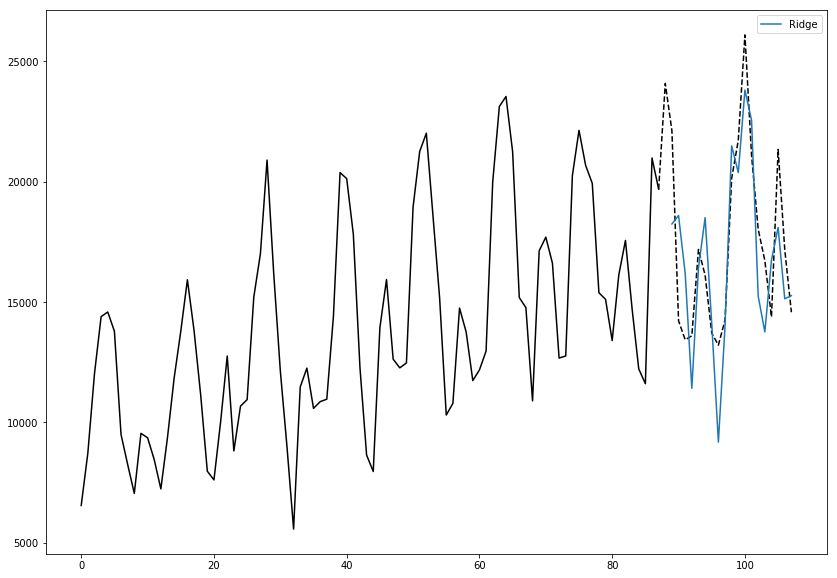

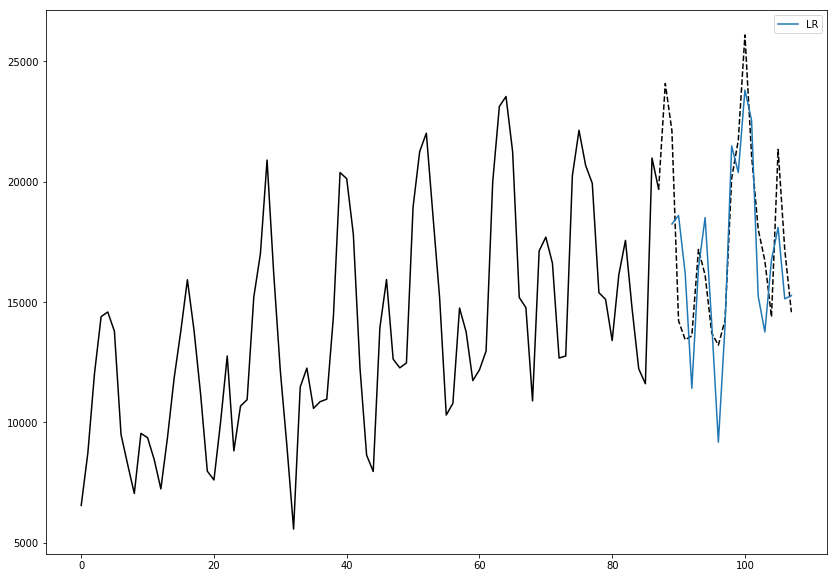

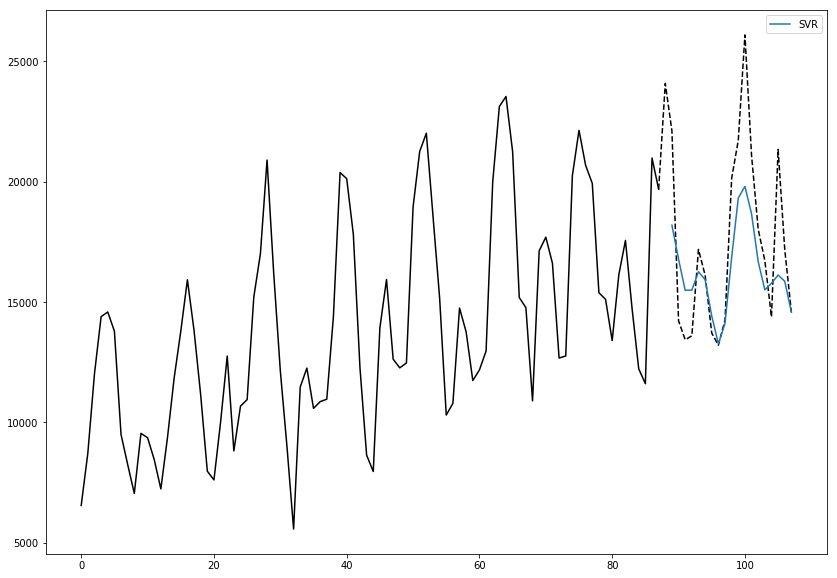

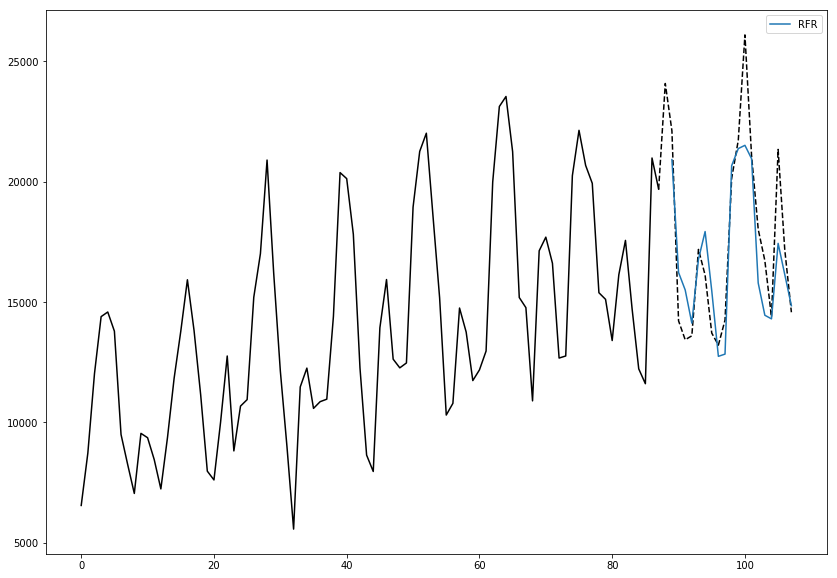

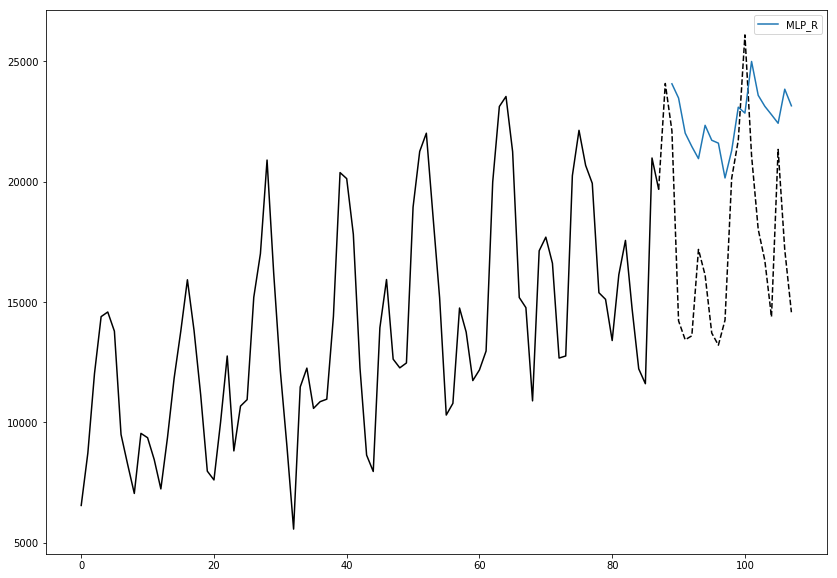

In [114]:
size=15



all_data = []
for name, model in models: 
    
    plt.figure(figsize=(14,10))
    plt.plot(series,'k-')
    data = np.zeros(series_row_np.shape[0], dtype=float)
    data.fill(np.nan)
    data[-21:] = series_row.values[-21:]
    plt.plot(data, 'k--')
    
    data = np.zeros(series_row_np.shape[0], dtype=float)
    data.fill(np.nan)
    for i in range(1,20):
        point = np.array([series_row_np[ (series_row_np.shape[0]-((size+1*i))):(series_row_np.shape[0]-(1*i))]])
        pre=model.predict(point)
        
        data[-i]=pre
    all_data.append(data)
    plt.plot( data , label=name)
    plt.legend(loc='best')
plt.show()